In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in haxby_db.all() if 'rest' not in b.task],
                                                  mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100)

05/18/2020 17:05:54 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 17:05:55 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 17:05:55 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 17:05:56 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/18/2020 17:05:57 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/18/2020 17:07:11 [Epoch 1] (7687ms) Posterior free-energy 1.72302746e+10
05/18/2020 17:07:11 Saving checkpoint...
05/18/2020 17:07:17 [Epoch 2] (5575ms) Posterior free-energy 1.61727283e+10
05/18/2020 17:07:23 [Epoch 3] (5672ms) Posterior free-energy 1.54176010e+10
05/18/2020 17:07:28 [Epoch 4] (5594ms) Posterior free-energy 1.50563328e+10
05/18/2020 17:07:34 [Epoch 5] (5664ms) Posterior free-energy 1.42563451e+10
05/18/2020 17:07:39 [Epoch 6] (5627ms) Posterior free-energy 1.35613317e+10
05/18/2020 17:07:45 [Epoch 7] (5663ms) Posterior free-energy 1.30497167e+10
05/18/2020 17:07:51 [Epoch 8] (5584ms) Posterior free-energy 1.28190751e+10
05/18/2020 17:07:56 [Epoch 9] (5650ms) Posterior free-energy 1.24048415e+10
05/18/2020 17:08:02 [Epoch 10] (5658ms) Posterior free-energy 1.20886303e+10
05/18/2020 17:08:08 [Epoch 11] (5657ms) Posterior free-energy 1.18197770e+10
05/18/2020 17:08:13 [Epoch 12] (5660ms) Posterior free-energy 1.14511933e+10
05/18/2020 17:08:19 [Epoch 13] (5684ms) Post

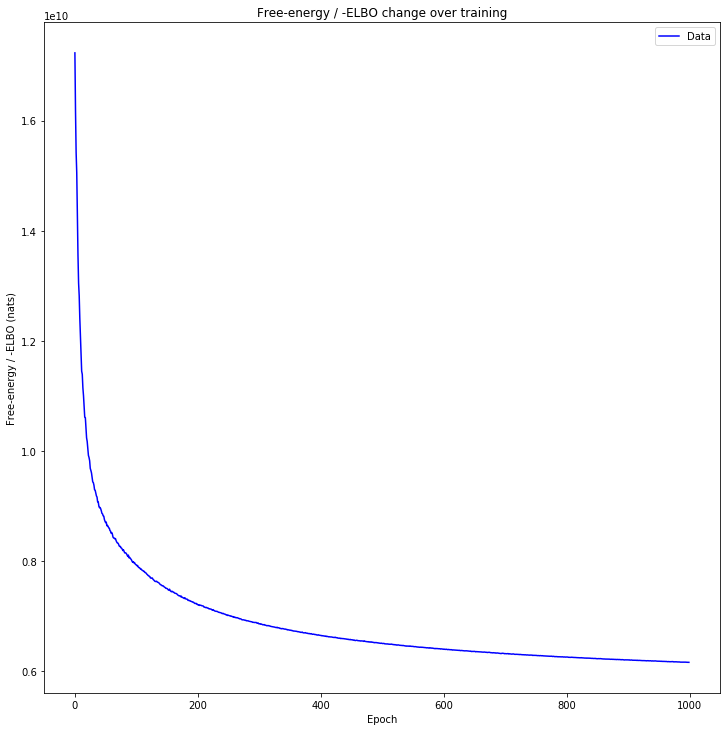

In [8]:
utils.plot_losses(losses)

In [9]:
import re

In [10]:
def subject_labeler(subject):
    return 'Participant %d' % (int(subject))

In [11]:
def task_labeler(task):
    return task

In [12]:
def subject_task_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

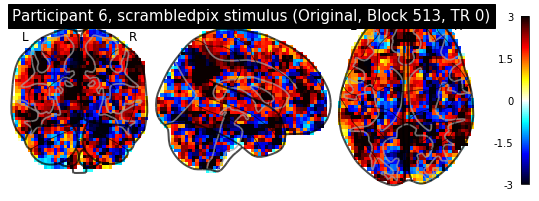

05/18/2020 18:40:17 Reconstruction Error (Frobenius Norm): 5.73735474e+02 out of 5.72112305e+02


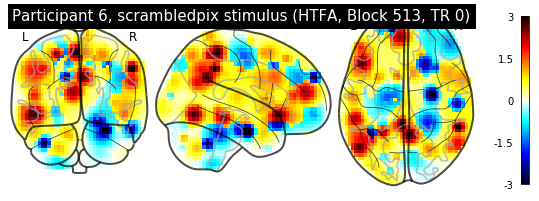

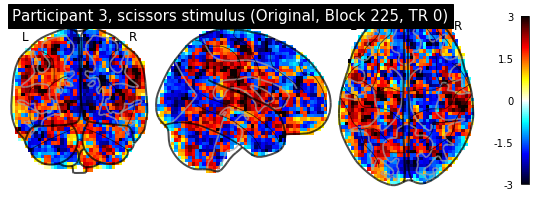

05/18/2020 18:40:19 Reconstruction Error (Frobenius Norm): 5.33709412e+02 out of 5.37134155e+02


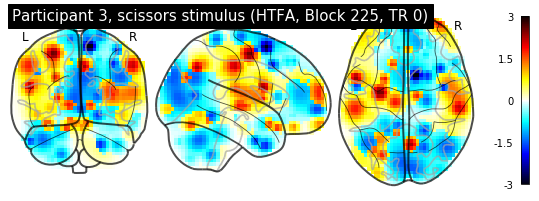

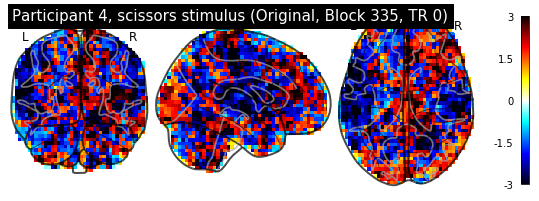

05/18/2020 18:40:21 Reconstruction Error (Frobenius Norm): 5.96910156e+02 out of 5.97586182e+02


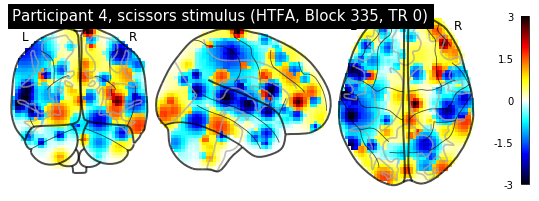

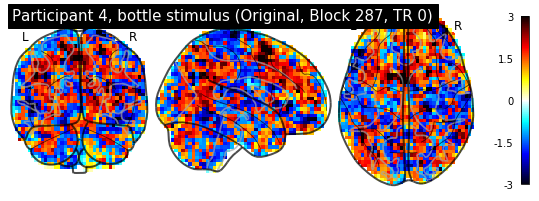

05/18/2020 18:40:23 Reconstruction Error (Frobenius Norm): 5.81760071e+02 out of 5.84559814e+02


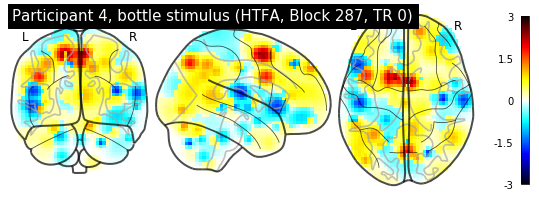

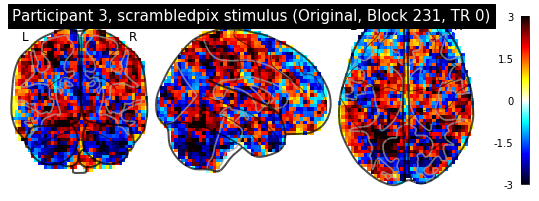

05/18/2020 18:40:25 Reconstruction Error (Frobenius Norm): 5.31611877e+02 out of 5.59874817e+02


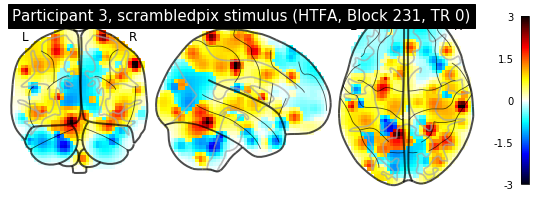

In [13]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=subject_task_labeler)
    htfa.plot_reconstruction(b, labeler=subject_task_labeler)

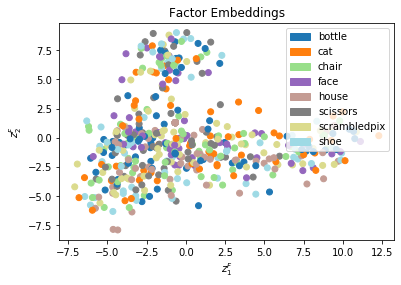

In [14]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='PCA')

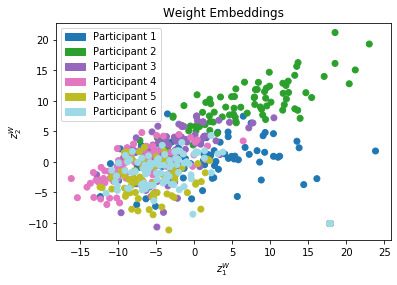

In [15]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='PCA')

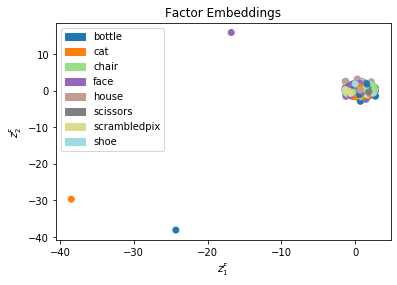

In [16]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=lambda block: task_labeler(block.task), embedding='TSNE')

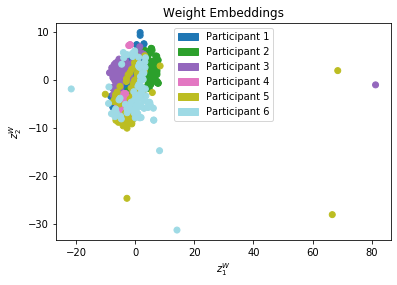

In [17]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=lambda block: subject_labeler(block.subject), embedding='TSNE')

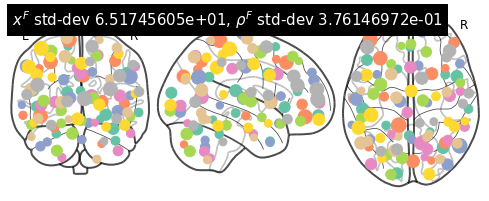

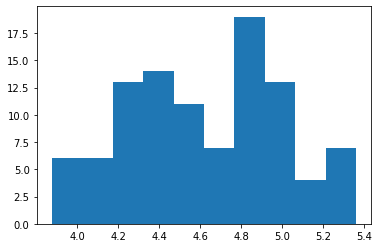

(<nilearn.plotting.displays.OrthoProjector at 0x7f65131a7d90>,
 tensor([[-49.8660, -25.5550,  16.2571],
         [ 34.8325, -66.3977, -24.2584],
         [ 49.3070,   8.7505,  33.8762],
         [ 27.0935,  61.3779,  -9.6849],
         [ -0.9882, -53.5428,  30.6510],
         [-45.2365,  25.9699,  -1.0326],
         [-25.1322, -42.8409, -29.6555],
         [-12.8270,  16.3941,  62.4932],
         [ 61.5098, -25.6163,  -7.2976],
         [ 21.1572, -49.4987, -14.3364],
         [  0.3605,  39.5458,  15.4537],
         [-13.6073, -93.2499,  14.0229],
         [ 37.0945,  10.6016, -37.0097],
         [-27.1901, -12.6080, -23.2381],
         [ 36.7992, -61.1904,  46.8787],
         [-43.2592, -65.4894,  38.7203],
         [ 46.4856,  44.2757,   1.9537],
         [ 22.9324,  11.4585,   4.2531],
         [ 22.4823, -79.9204, -40.2946],
         [-41.8741,  47.4713, -11.2856],
         [-60.1512, -14.8898, -10.2468],
         [ 36.9986,  17.1959,  49.2621],
         [-11.8313, -42.6387,  69.3

In [18]:
htfa.visualize_factor_template()

In [19]:
htfa.average_reconstruction_error(weighted=False, blocks_filter=haxby_db.inference_filter(training=True))

05/18/2020 18:40:45 Average reconstruction error (MSE): 5.01500856e+02 +/- 3.64908264e+01
05/18/2020 18:40:45 Average data norm (Euclidean): 6.03396825e+02 +/- 6.17218783e+01
05/18/2020 18:40:45 Percent average reconstruction error: 83.409462 +/- 3.71063698e+00


(array([543.84442139, 525.4487915 , 493.46469116, 502.30612183,
        511.81637573, 503.57818604, 509.37768555, 475.50384521,
        542.14282227, 517.65039062, 493.48510742, 447.59072876,
        466.47344971, 482.32592773, 538.93829346, 531.15563965,
        495.36428833, 488.82620239, 469.65338135, 503.30984497,
        476.49465942, 518.50665283, 487.4864502 , 497.14746094,
        600.36358643, 541.52429199, 495.01959229, 524.95526123,
        474.76641846, 505.94265747, 514.50158691, 470.24749756,
        566.11932373, 513.16589355, 464.33963013, 485.2166748 ,
        517.50085449, 485.49172974, 503.63262939, 528.25140381,
        577.33508301, 496.45089722, 499.05581665, 516.36828613,
        519.4777832 , 508.8187561 , 538.31152344, 486.14657593,
        515.98590088, 529.862854  , 480.09164429, 458.61791992,
        501.28121948, 539.17272949, 508.51904297, 540.70507812,
        450.45806885, 447.95056152, 463.35366821, 445.90097046,
        461.00048828, 468.70135498, 427.